In [22]:
import matplotlib.pyplot as plt

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from soupsieve import select

sns.set_theme(style='whitegrid')
print('cell successfully ran')

df = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/AHI_Microcourse_Visualization/main/Data/Georgia_COVID/Georgia_COVID-19_Case_Data.csv')
df

len(df)
df.shape
df.info
list(df)

df['COUNTY']
df['COUNTY'].value_counts()
df_counties = df['COUNTY'].value_counts()
###preview that we want to look at top of frame, specific amoun
df_counties.head(10)

df['DATESTAMP']

## creating a copy of existing column to keep a copy of original version
df['DATESTAMP_MOD'] = df['DATESTAMP']
print(df['DATESTAMP_MOD'].head(10))
print(df['DATESTAMP_MOD'].dtypes)

df['DATESTAMP_MOD'] = pd.to_datetime(df['DATESTAMP_MOD'])
df['DATESTAMP_MOD'].dtypes

df[['DATESTAMP', 'DATESTAMP_MOD']]

df['DATESTAMP_MOD_DAY'] = df['DATESTAMP_MOD'].dt.date 
df['DATESTAMP_MOD_DAY']

df['DATESTAMP_MOD_YEAR'] = df['DATESTAMP_MOD'].dt.year
df['DATESTAMP_MOD_YEAR']
df['DATESTAMP_MOD_MONTH'] = df['DATESTAMP_MOD'].dt.month
df['DATESTAMP_MOD_MONTH']

df
df['DATESTAMP_MOD_MONTH_YEAR'] = df['DATESTAMP_MOD'].dt.to_period('M')
df['DATESTAMP_MOD_MONTH_YEAR'].sort_values()
df['DATESTAMP_MOD_WEEK'] = df['DATESTAMP_MOD'].dt.week
df['DATESTAMP_MOD_WEEK']

df['DATESTAMP_MOD_QUARTER'] = df['DATESTAMP_MOD'].dt.to_period('Q')
df['DATESTAMP_MOD_QUARTER'].sort_values()

df['DATESTAMP_MOD_DAY_STRING'] = df['DATESTAMP_MOD'].astype(str)
df['DATESTAMP_MOD_DAY_STRING']
df['DATESTAMP_MOD_WEEK_STRING'] = df['DATESTAMP_MOD'].astype(str)
df['DATESTAMP_MOD_WEEK_STRING']
df['DATETIME_STRING'] =df['DATESTAMP_MOD_MONTH_YEAR'].astype(str)


cell successfully ran
0    2021/04/13 03:59:59+00
1    2021/02/04 05:00:00+00
2    2021/04/14 03:59:59+00
3    2021/02/05 05:00:00+00
4    2021/04/15 03:59:59+00
5    2021/02/06 05:00:00+00
6    2021/02/07 05:00:00+00
7    2021/04/16 03:59:59+00
8    2021/04/17 03:59:59+00
9    2021/02/08 05:00:00+00
Name: DATESTAMP_MOD, dtype: object
object


/Users/wendyarias/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/var/folders/ks/mfgmysmj4ls9xl90wxss5s7r0000gn/T/ipykernel_5341/2558440762.py:48: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['DATESTAMP_MOD_WEEK'] = df['DATESTAMP_MOD'].dt.week
/Users/wendyarias/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [11]:
## getting the counties required for our analysis
## we know the counties we want to analyze are COBB, dekalb, fulton, gwinnett, hall

df['COUNTY']
countList = ['COBB', 'DEKALB', 'FULTON', 'GWINNETT', 'HALL']
countList

selectCounties = df[df['COUNTY'].isin(countList)]
len(selectCounties)


2830

In [12]:
## getting just the specific date/time frame we want
selectCountyTime = selectCounties
selectCountyTime['DATESTAMP_MOD_MONTH_YEAR']

selectCountTime_april2020 = selectCountyTime[selectCountyTime['DATESTAMP_MOD_MONTH_YEAR'] == '2020-04']
len(selectCountTime_april2020)

selectCountTime_aprilmay2020 = selectCountyTime[(selectCountyTime['DATESTAMP_MOD_MONTH_YEAR'] == '2020-05') | (selectCountyTime['DATESTAMP_MOD_MONTH_YEAR'] == '2020-04')]
len(selectCountTime_aprilmay2020)

selectCountTime_aprilmay2020.head(50)

,OBJECTID,COUNTY,CNTY_FIPS,DATESTAMP,C_New,C_Cum,D_New,D_Cum,H_New,H_Cum,...,DATESTAMP_MOD,DATESTAMP_MOD_DAY,DATESTAMP_MOD_YEAR,DATESTAMP_MOD_MONTH,DATESTAMP_MOD_MONTH_YEAR,DATESTAMP_MOD_WEEK,DATESTAMP_MOD_QUARTER,DATESTAMP_MOD_DAY_STRING,DATESTAMP_MOD_WEEK_STRING,DATETIME_STRING
7464,7465,FULTON,5049,2020/04/01 03:59:59+00,97,1499,10,109,22,460,...,2020-04-01 03:59:59+00:00,2020-04-01,2020,4,2020-04,14,2020Q2,2020-04-01 03:59:59+00:00,2020-04-01 03:59:59+00:00,2020-04
7465,7466,FULTON,5049,2020/04/02 03:59:59+00,50,1549,3,112,9,469,...,2020-04-02 03:59:59+00:00,2020-04-02,2020,4,2020-04,14,2020Q2,2020-04-02 03:59:59+00:00,2020-04-02 03:59:59+00:00,2020-04
7466,7467,FULTON,5049,2020/04/03 03:59:59+00,68,1617,10,122,17,486,...,2020-04-03 03:59:59+00:00,2020-04-03,2020,4,2020-04,14,2020Q2,2020-04-03 03:59:59+00:00,2020-04-03 03:59:59+00:00,2020-04
7467,7468,FULTON,5049,2020/04/04 03:59:59+00,38,1655,5,127,10,496,...,2020-04-04 03:59:59+00:00,2020-04-04,2020,4,2020-04,14,2020Q2,2020-04-04 03:59:59+00:00,2020-04-04 03:59:59+00:00,2020-04
7468,7469,FULTON,5049,2020/04/05 03:59:59+00,30,1685,1,128,12,508,...,2020-04-05 03:59:59+00:00,2020-04-05,2020,4,2020-04,14,2020Q2,2020-04-05 03:59:59+00:00,2020-04-05 03:59:59+00:00,2020-04
7469,7470,FULTON,5049,2020/04/06 03:59:59+00,62,1747,0,128,11,519,...,2020-04-06 03:59:59+00:00,2020-04-06,2020,4,2020-04,15,2020Q2,2020-04-06 03:59:59+00:00,2020-04-06 03:59:59+00:00,2020-04
7470,7471,FULTON,5049,2020/04/07 03:59:59+00,77,1824,7,135,11,530,...,2020-04-07 03:59:59+00:00,2020-04-07,2020,4,2020-04,15,2020Q2,2020-04-07 03:59:59+00:00,2020-04-07 03:59:59+00:00,2020-04
7471,7472,FULTON,5049,2020/04/08 03:59:59+00,69,1893,5,140,13,543,...,2020-04-08 03:59:59+00:00,2020-04-08,2020,4,2020-04,15,2020Q2,2020-04-08 03:59:59+00:00,2020-04-08 03:59:59+00:00,2020-04
7472,7473,FULTON,5049,2020/04/09 03:59:59+00,59,1952,4,144,7,550,...,2020-04-09 03:59:59+00:00,2020-04-09,2020,4,2020-04,15,2020Q2,2020-04-09 03:59:59+00:00,2020-04-09 03:59:59+00:00,2020-04
7473,7474,FULTON,5049,2020/04/10 03:59:59+00,55,2007,3,147,10,560,...,2020-04-10 03:59:59+00:00,2020-04-10,2020,4,2020-04,15,2020Q2,2020-04-10 03:59:59+00:00,2020-04-10 03:59:59+00:00,2020-04


In [46]:
## creating the final dataframe/specific columns-features-attributes what we care about 

finalDF= selectCountTime_aprilmay2020[[
'COUNTY', 
'DATESTAMP_MOD', 
'DATESTAMP_MOD_DAY', 
'DATESTAMP_MOD_DAY_STRING', 
'DATETIME_STRING', 
'DATESTAMP_MOD_MONTH_YEAR', 
'C_New', 
'H_Cum', 
'C_Cum', 
'D_New',
'H_New'
]]
finalDF


,COUNTY,DATESTAMP_MOD,DATESTAMP_MOD_DAY,DATESTAMP_MOD_DAY_STRING,DATETIME_STRING,DATESTAMP_MOD_MONTH_YEAR,C_New,H_Cum,C_Cum,D_New,H_New
7464,FULTON,2020-04-01 03:59:59+00:00,2020-04-01,2020-04-01 03:59:59+00:00,2020-04,2020-04,97,460,1499,10,22
7465,FULTON,2020-04-02 03:59:59+00:00,2020-04-02,2020-04-02 03:59:59+00:00,2020-04,2020-04,50,469,1549,3,9
7466,FULTON,2020-04-03 03:59:59+00:00,2020-04-03,2020-04-03 03:59:59+00:00,2020-04,2020-04,68,486,1617,10,17
7467,FULTON,2020-04-04 03:59:59+00:00,2020-04-04,2020-04-04 03:59:59+00:00,2020-04,2020-04,38,496,1655,5,10
7468,FULTON,2020-04-05 03:59:59+00:00,2020-04-05,2020-04-05 03:59:59+00:00,2020-04,2020-04,30,508,1685,1,12
...,...,...,...,...,...,...,...,...,...,...,...
79995,HALL,2020-05-01 03:59:59+00:00,2020-05-01,2020-05-01 03:59:59+00:00,2020-05,2020-05,47,305,2069,1,8
79996,HALL,2020-05-02 03:59:59+00:00,2020-05-02,2020-05-02 03:59:59+00:00,2020-05,2020-05,26,312,2095,3,7
79997,HALL,2020-05-03 03:59:59+00:00,2020-05-03,2020-05-03 03:59:59+00:00,2020-05,2020-05,12,316,2107,0,4
79998,HALL,2020-05-04 03:59:59+00:00,2020-05-04,2020-05-04 03:59:59+00:00,2020-05,2020-05,35,320,2142,1,4


In [47]:
##looking at total covid cases by month
finalDF_dropdupes = finalDF.drop_duplicates(subset=['COUNTY', 'DATETIME_STRING'], keep='last')
finalDF_dropdupes

pd.pivot_table(finalDF_dropdupes, values= 'C_Cum', index=['COUNTY'], columns=['DATESTAMP_MOD_MONTH_YEAR'], aggfunc=np.sum)

DATESTAMP_MOD_MONTH_YEAR,2020-04,2020-05
COUNTY,,
COBB,2167,3386
DEKALB,2517,4271
FULTON,3189,4657
GWINNETT,2242,4544
HALL,2022,2163


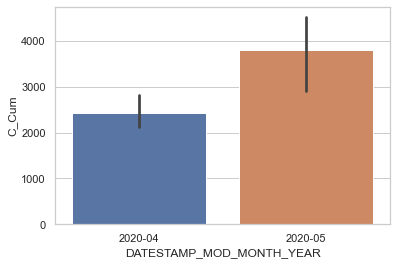

In [48]:
vis1 = sns.barplot(x='DATESTAMP_MOD_MONTH_YEAR' , y= 'C_Cum', data=finalDF_dropdupes)

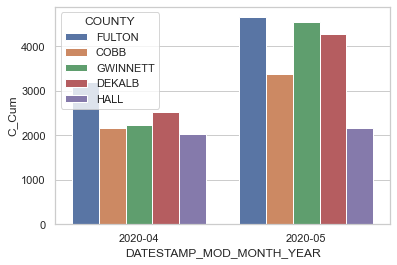

In [49]:
vis2 = sns.barplot(x='DATESTAMP_MOD_MONTH_YEAR' , y= 'C_Cum', hue="COUNTY", data=finalDF_dropdupes)

In [50]:
plotly1 = px.bar(finalDF_dropdupes, x='DATETIME_STRING', y='C_Cum', color='COUNTY', barmode='group')
plotly1.show()

In [51]:
plotly2 = px.bar(finalDF_dropdupes, x='DATETIME_STRING', y='C_Cum', color='COUNTY', barmode='stack')
plotly2.show()

##looking at total covid cases by day

In [52]:
daily = finalDF
daily
len(daily)

305

In [53]:
pd.pivot_table(daily, values= 'C_Cum', index=['COUNTY'], columns=['DATESTAMP_MOD_DAY'], aggfunc=np.sum)

DATESTAMP_MOD_DAY,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,...,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31
COUNTY,,,,,,,,,,,,,,,,,,,,,
COBB,867,893,921,935,956,999,1026,1073,1116,1160,...,3091,3131,3147,3178,3222,3259,3291,3333,3365,3386
DEKALB,937,987,1038,1069,1099,1159,1213,1252,1317,1371,...,3858,3891,3924,3959,4025,4098,4153,4209,4240,4271
FULTON,1499,1549,1617,1655,1685,1747,1824,1893,1952,2007,...,4276,4310,4336,4365,4437,4510,4558,4614,4637,4657
GWINNETT,614,657,702,734,766,811,858,905,952,1002,...,3781,3864,3928,3985,4101,4216,4304,4410,4503,4544
HALL,257,300,336,359,392,453,502,566,628,686,...,2579,2594,2603,2624,2634,2653,2668,2682,2707,2713


In [54]:
tempDF = pd.pivot_table(daily, values= 'C_Cum', index=['DATESTAMP_MOD_DAY'], columns=['COUNTY'], aggfunc=np.sum)
tempDF.head(50)

COUNTY,COBB,DEKALB,FULTON,GWINNETT,HALL
DATESTAMP_MOD_DAY,,,,,
2020-04-01,867,937,1499,614,257
2020-04-02,893,987,1549,657,300
2020-04-03,921,1038,1617,702,336
2020-04-04,935,1069,1655,734,359
2020-04-05,956,1099,1685,766,392
2020-04-06,999,1159,1747,811,453
2020-04-07,1026,1213,1824,858,502
2020-04-08,1073,1252,1893,905,566
2020-04-09,1116,1317,1952,952,628


In [55]:
startdate = pd.to_datetime("2020-04-26").date()
enddate = pd.to_datetime("2020-05-09").date()
maskFilter = (daily['DATESTAMP_MOD_DAY'] >= startdate) & (daily['DATESTAMP_MOD_DAY'] <= enddate)
dailySpecific = daily.loc[maskFilter] ##.loc is short for locate
dailySpecific

,COUNTY,DATESTAMP_MOD,DATESTAMP_MOD_DAY,DATESTAMP_MOD_DAY_STRING,DATETIME_STRING,DATESTAMP_MOD_MONTH_YEAR,C_New,H_Cum,C_Cum,D_New,H_New
7489,FULTON,2020-04-26 03:59:59+00:00,2020-04-26,2020-04-26 03:59:59+00:00,2020-04,2020-04,36,752,2910,6,10
7490,FULTON,2020-04-27 03:59:59+00:00,2020-04-27,2020-04-27 03:59:59+00:00,2020-04,2020-04,51,760,2961,4,8
7491,FULTON,2020-04-28 03:59:59+00:00,2020-04-28,2020-04-28 03:59:59+00:00,2020-04,2020-04,77,770,3038,3,10
7492,FULTON,2020-04-29 03:59:59+00:00,2020-04-29,2020-04-29 03:59:59+00:00,2020-04,2020-04,78,787,3116,8,17
7493,FULTON,2020-04-30 03:59:59+00:00,2020-04-30,2020-04-30 03:59:59+00:00,2020-04,2020-04,73,792,3189,5,5
...,...,...,...,...,...,...,...,...,...,...,...
79995,HALL,2020-05-01 03:59:59+00:00,2020-05-01,2020-05-01 03:59:59+00:00,2020-05,2020-05,47,305,2069,1,8
79996,HALL,2020-05-02 03:59:59+00:00,2020-05-02,2020-05-02 03:59:59+00:00,2020-05,2020-05,26,312,2095,3,7
79997,HALL,2020-05-03 03:59:59+00:00,2020-05-03,2020-05-03 03:59:59+00:00,2020-05,2020-05,12,316,2107,0,4
79998,HALL,2020-05-04 03:59:59+00:00,2020-05-04,2020-05-04 03:59:59+00:00,2020-05,2020-05,35,320,2142,1,4


In [56]:
dailySpecific[dailySpecific['COUNTY'] == 'FULTON']

,COUNTY,DATESTAMP_MOD,DATESTAMP_MOD_DAY,DATESTAMP_MOD_DAY_STRING,DATETIME_STRING,DATESTAMP_MOD_MONTH_YEAR,C_New,H_Cum,C_Cum,D_New,H_New
7489,FULTON,2020-04-26 03:59:59+00:00,2020-04-26,2020-04-26 03:59:59+00:00,2020-04,2020-04,36,752,2910,6,10
7490,FULTON,2020-04-27 03:59:59+00:00,2020-04-27,2020-04-27 03:59:59+00:00,2020-04,2020-04,51,760,2961,4,8
7491,FULTON,2020-04-28 03:59:59+00:00,2020-04-28,2020-04-28 03:59:59+00:00,2020-04,2020-04,77,770,3038,3,10
7492,FULTON,2020-04-29 03:59:59+00:00,2020-04-29,2020-04-29 03:59:59+00:00,2020-04,2020-04,78,787,3116,8,17
7493,FULTON,2020-04-30 03:59:59+00:00,2020-04-30,2020-04-30 03:59:59+00:00,2020-04,2020-04,73,792,3189,5,5
7494,FULTON,2020-05-01 03:59:59+00:00,2020-05-01,2020-05-01 03:59:59+00:00,2020-05,2020-05,54,807,3243,4,15
7495,FULTON,2020-05-02 03:59:59+00:00,2020-05-02,2020-05-02 03:59:59+00:00,2020-05,2020-05,29,811,3272,3,4
7496,FULTON,2020-05-03 03:59:59+00:00,2020-05-03,2020-05-03 03:59:59+00:00,2020-05,2020-05,33,819,3305,6,8
7497,FULTON,2020-05-04 03:59:59+00:00,2020-05-04,2020-05-04 03:59:59+00:00,2020-05,2020-05,47,826,3352,3,7
7498,FULTON,2020-05-05 03:59:59+00:00,2020-05-05,2020-05-05 03:59:59+00:00,2020-05,2020-05,60,831,3412,1,5


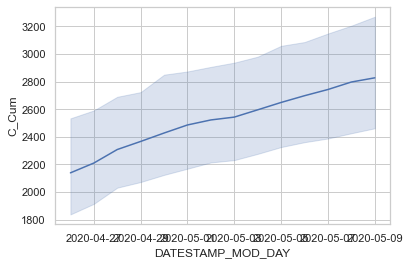

In [57]:
vis3 = sns.lineplot(data=dailySpecific, x="DATESTAMP_MOD_DAY", y='C_Cum')

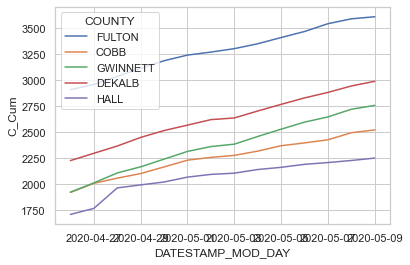

In [37]:
vis4 = sns.lineplot(data=dailySpecific, x="DATESTAMP_MOD_DAY", y='C_Cum', hue='COUNTY')

In [58]:
plotly3 = px.bar(dailySpecific, x='DATESTAMP_MOD_DAY', y='C_Cum', color='COUNTY')
plotly3.show()

In [59]:
plotly4 = px.bar(dailySpecific, x='DATESTAMP_MOD_DAY', y='H_New', color='COUNTY', barmode = 'group')
plotly4.show()

In [60]:
plotly5 = px.bar(dailySpecific, x='DATESTAMP_MOD_DAY', y='H_Cum', color='COUNTY', barmode = 'group')
plotly5.show()

In [61]:
plotly6 = px.bar(dailySpecific, x='DATESTAMP_MOD_DAY', y='D_New', color='COUNTY', barmode = 'group')
plotly6.show()

In [63]:
dailySpecific['newHospandDeathCovid'] = dailySpecific['D_New'].astype(int) + dailySpecific['H_New'].astype(int) + dailySpecific['C_New'].astype(int)
dailySpecific['newHospandDeathCovid']

/var/folders/ks/mfgmysmj4ls9xl90wxss5s7r0000gn/T/ipykernel_5341/1256246860.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



7489      52
7490      63
7491      90
7492     103
7493      83
        ... 
79995     56
79996     36
79997     16
79998     40
79999     24
Name: newHospandDeathCovid, Length: 70, dtype: int64

In [64]:
dailySpecific

,COUNTY,DATESTAMP_MOD,DATESTAMP_MOD_DAY,DATESTAMP_MOD_DAY_STRING,DATETIME_STRING,DATESTAMP_MOD_MONTH_YEAR,C_New,H_Cum,C_Cum,D_New,H_New,newHospandDeathCovid
7489,FULTON,2020-04-26 03:59:59+00:00,2020-04-26,2020-04-26 03:59:59+00:00,2020-04,2020-04,36,752,2910,6,10,52
7490,FULTON,2020-04-27 03:59:59+00:00,2020-04-27,2020-04-27 03:59:59+00:00,2020-04,2020-04,51,760,2961,4,8,63
7491,FULTON,2020-04-28 03:59:59+00:00,2020-04-28,2020-04-28 03:59:59+00:00,2020-04,2020-04,77,770,3038,3,10,90
7492,FULTON,2020-04-29 03:59:59+00:00,2020-04-29,2020-04-29 03:59:59+00:00,2020-04,2020-04,78,787,3116,8,17,103
7493,FULTON,2020-04-30 03:59:59+00:00,2020-04-30,2020-04-30 03:59:59+00:00,2020-04,2020-04,73,792,3189,5,5,83
...,...,...,...,...,...,...,...,...,...,...,...,...
79995,HALL,2020-05-01 03:59:59+00:00,2020-05-01,2020-05-01 03:59:59+00:00,2020-05,2020-05,47,305,2069,1,8,56
79996,HALL,2020-05-02 03:59:59+00:00,2020-05-02,2020-05-02 03:59:59+00:00,2020-05,2020-05,26,312,2095,3,7,36
79997,HALL,2020-05-03 03:59:59+00:00,2020-05-03,2020-05-03 03:59:59+00:00,2020-05,2020-05,12,316,2107,0,4,16
79998,HALL,2020-05-04 03:59:59+00:00,2020-05-04,2020-05-04 03:59:59+00:00,2020-05,2020-05,35,320,2142,1,4,40


In [68]:
plotly7 = px.bar(dailySpecific, x='DATESTAMP_MOD_DAY', y='newHospandDeathCovid', color='COUNTY', title="Georgia 2020 COVID Data: Total New Hospitilizations, Deaths, and COVID cases by County",
labels={
    "DATESTAMP_MOD_DAY" : "Time (Month, Day, Year)",
    "newHospandDeathCovid" : "Total Count"
}, 
barmode = 'group')

plotly7.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        type='category'
    )
)
plotly7.show()